Sponcered by Pieces

In [54]:
!pip install jupyter_pieces


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [56]:
# different airlines

df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [57]:
# source city

df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [58]:
# destination airlines

df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [59]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [60]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [61]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [62]:
df.shape

(300153, 12)

In [63]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

Preprocessing

dropping some columns which are irrevalant and onehotencoding the strings

In [64]:
df = df.drop(['Unnamed: 0','flight'], axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [65]:
df['stops'] = pd.factorize(df.stops)[0] #encoding to unique values starting from '0'

In [66]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [67]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time', axis=1)

In [68]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Randome Forest Regression Model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [70]:
reg = RandomForestRegressor(n_jobs=-1) # maximize processor

reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [75]:
reg.score(X_test, y_test)

0.9855651786696045

Importing different metric scores to understand model better

In [76]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("R2:", mean_absolute_error(y_test, y_pred))
print("R2:", mean_squared_error(y_test, y_pred))
print("R2:", math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9855651786696045
R2: 1057.8208765325803
R2: 7384990.221962155
R2: 2717.533849276243


Text(0.5, 1.0, 'Prediction v/s Actual price')

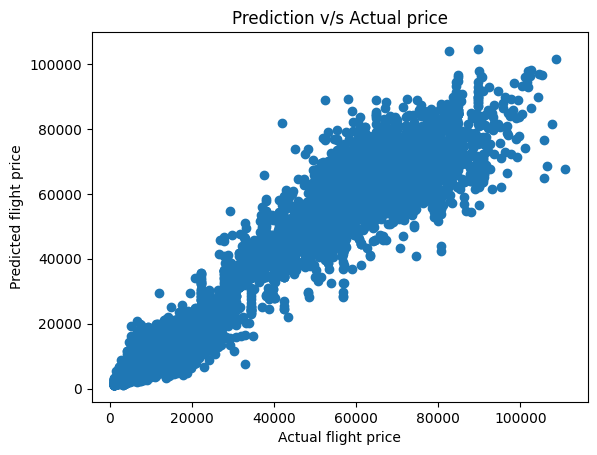

In [77]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title("Prediction v/s Actual price")


Finding which features are more revelant

In [78]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importance = sorted(importances.items(), key=lambda x:x[1], reverse=True)

sorted_importance

[('class', np.float64(0.8802200271354842)),
 ('duration', np.float64(0.05721477544279479)),
 ('days_left', np.float64(0.018636406836837077)),
 ('airline_Air_India', np.float64(0.005241093798885063)),
 ('airline_Vistara', np.float64(0.00460699208420845)),
 ('source_city_Delhi', np.float64(0.003877666762110439)),
 ('destination_city_Delhi', np.float64(0.0034495511898097776)),
 ('source_city_Mumbai', np.float64(0.002250197930144402)),
 ('destination_city_Mumbai', np.float64(0.001956381188216993)),
 ('stops', np.float64(0.0018184978886355684)),
 ('destination_city_Kolkata', np.float64(0.0017846773728722209)),
 ('source_city_Kolkata', np.float64(0.001747397161572702)),
 ('destination_city_Hyderabad', np.float64(0.0015620860122478304)),
 ('arrival_time_Evening', np.float64(0.0013919753086634467)),
 ('source_city_Hyderabad', np.float64(0.0012616348544173316)),
 ('arrival_time_Night', np.float64(0.00118112033910339)),
 ('departure_time_Evening', np.float64(0.0011579380368720296)),
 ('destinati

<BarContainer object of 10 artists>

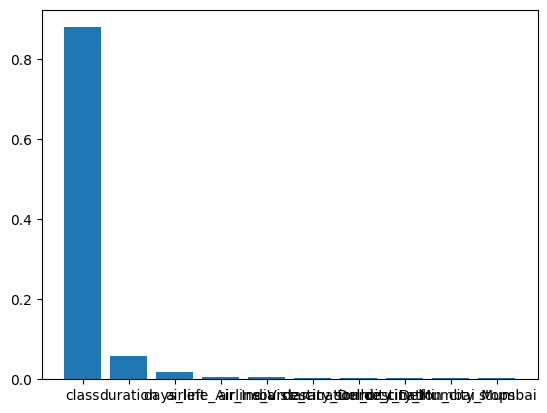

In [79]:
plt.Figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importance[:10]], [x[1] for x in sorted_importance[:10]])

Hyperparameter tuning

In [ ]:
# Takes a hell lot of time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [80]:
# so will use randomizedsearch CV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10,20,30],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':[1.0,'auto','sqrt']
}

reg = RandomForestRegressor(n_jobs=1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_grid, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\INRAJR\honeypot\insurance\Regression-Example\reg\Lib\site-packages\sklear

RandomForestRegressor(max_depth=30, min_samples_leaf=2, n_estimators=257,
                      n_jobs=1)

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("R2:", mean_absolute_error(y_test, y_pred))
print("R2:", mean_squared_error(y_test, y_pred))
print("R2:", math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual flight price')
plt.ylabel('Predicted flight price')
plt.title("Prediction v/s Actual price")